<header>
    <h1>Project 2</h1>
    <h2>Option 2: Estimating The Area Under The Curve</h2>
    <h3>BSc Data Science Christopher Soo UID: 2330085</h3>
</header>
<p><a href="https://linkedin.com/in/christopher-tangsoo">More about me here!</a></p>

<div>
    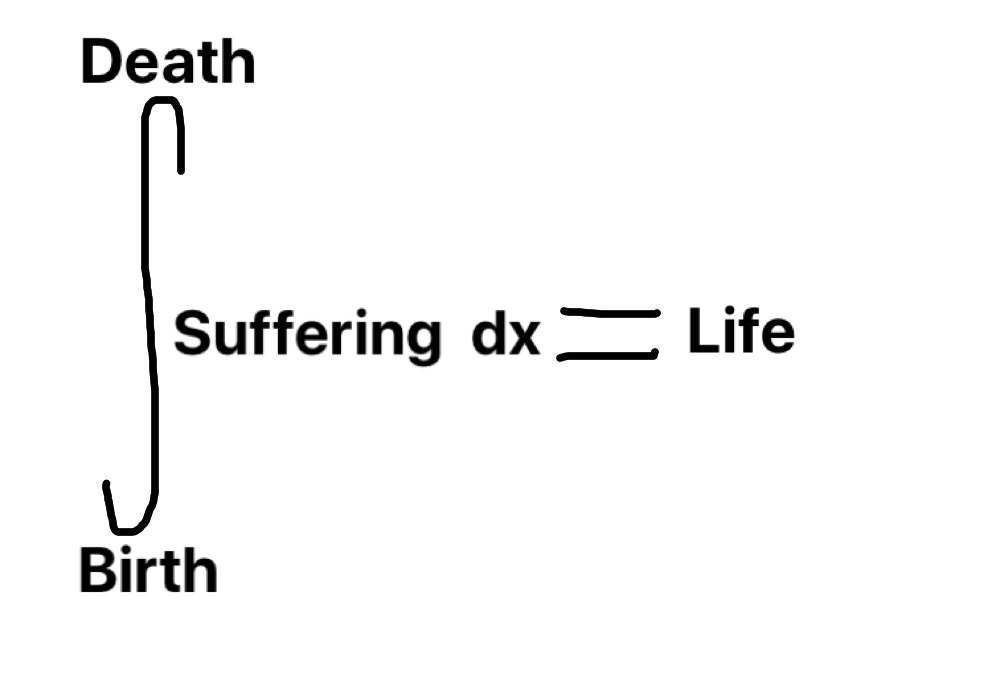
    <figure>Figure 1: "The integral of life" from Memedroid </figure>
</div>

<h1>Table of Contents</h1>

<nav>
    <ul>
        <li><a href='#i'>Introduction</a></li>
        <ul>
            <li><a href='#i1'>Setup</a></li>
        </ul>
        <li><a href="#m">Methodology</a></li>
        <ul>
            <li><a href='#m1'>The Trapezoidal Rule</a></li>
            <li><a href='#m2'>The Monte Carlo Integration</a></li>
        </ul>
        <li><a href='#r'>Results</a></li>
        <li><a href='#d'>Discussions</a></li>
        <li><a href='#ref'>References</a></li>
    </ul>
</nav>

<article>
<a id="i"></a>
<h2>Introduction</h2>
    <p>Finding the area of different shapes have always been one of the fundamental problems in Mathematics. While it is easy to find the area of simple shapes such as squares, triangles, and circles. It becomes increasingly complicated when it comes to odd shapes where it's curves are governed by elementary functions or even transcendental functions. This is where Integration comes in handy. By using the idea of infinity, instead of knowing the exact area of a certain shape, we are satisfied with just estimating it to a certain extent. This concept goes beyond Mathematics and Geometry and has applications throughout various fields such as Finance, Physics, Biology, and so on. There are numerous ways to Integrate a function, and this project aims to delve into two distinct methods; <strong>The Trapezium Rule</strong> and <strong>The Monte Carlo Integration</strong>. To integrate a function by hand, we can use this formula:</p>
<h6><center>$$\int_{a}^{b} f(x) \,dx$$</center></h6>
<h3>Integration Applications</h3>
    <ul>
        <li><strong>Finance:</strong> "Integration plays a crucial role in finance, providing powerful mathematical tools to analyze and model various aspects of financial systems, such as The Black-Scholes-Merton model, a famous options pricing model, involves the use of integration to calculate the theoretical value of options based on various parameters like asset price, strike price, time to expiration, and volatility. Another example are risk management models, particularly in calculating Value at Risk (VaR). VaR is a statistical measure that assesses the potential loss in value of a portfolio over a specific time period and with a given level of confidence. The calculation often involves integrating probability density functions to estimate potential losses." (ChatGPT 2023)</li><br>
        <li><strong>Biology:</strong> "Integration finds diverse applications in biology, providing valuable tools for modeling, analysis, and understanding various biological processes such as to model and analyze population growth and decline. Differential equations, often solved through integration, describe changes in population size over time, considering factors like birth rates, death rates, and immigration. Other examples include analysing genetic data and study gene expression patterns. The area under the curve in gene expression profiles, obtained through integration, provides insights into the overall activity of genes over time." (ChatGPT 2023)</li><br>
        <li><strong>Physics</strong> "Integration is a fundamental mathematical tool extensively used in physics across various domains such as in classical mechanics, where it is used to solve equations of motion and calculate quantities such as displacement, velocity, and acceleration. Integrating force with respect to time yields momentum, and integrating momentum yields the displacement or position of an object. Integration is also used in thermodynamics to calculate quantities such as internal energy, heat, and entropy. The area under a curve in a thermodynamic process on a pressure-volume diagram represents the work done and involves integration." (ChatGPT 2023)</li>
    </ul>
    <p>And so on...</p>
<h3>Programming in Mathematics</h3>
    <p>Knowledge of programming languages are crucial in Mathematics and other fields relating to quantitative research. We can leverage the computer's fast processing speed to do all the calculations within seconds which would take months to complete by hand. In this project, the Python Programming language will be used to evaluate the two methods described above. This project will use multiple Python libraries such as NumPy, Matplotlib, and Scipy.</p><br>
<h3>Motivation</h3>
    <p>This project aims to compare the advantages and the disadvantages of both methods by comparing their estimates to a better estimate, which will be calculated using the Scipy library. This project will also factor in the amount of iterations and the amount of time the computer takes to estimate the area, and consider optimisation algorithms to give better estimates. This project will then visualise the two methods using the Matplotlib library and finally give limitations and conclusion.</p>

<a id="i1"></a>
<h1>Setup</h1>

<p>For this project we will be using a variety of Python Libraries, their documentations can be found here:</p>
<ul>
    <li><a href="https://matplotlib.org/stable/index.html">MatPlotLib</a></li>
    <li><a href="https://numpy.org/doc/">NumPy</a></li>
    <li><a href="https://docs.scipy.org/doc//scipy/index.html">SciPy</a></li>
    <li><a href="https://docs.sympy.org/latest/index.html">SymPy</a></li>
    <li><a href="https://docs.python.org/3/library/time.html">Time (built-in)</a></li>
</ul>

<p>The sentences written after the # operator is a comment. Meaning it doesn't affect the code whatsoever but it helps explain how and what the corresponding code does.</p>

<h3>Module Imports</h3>

In [144]:
# This Magic Command allows the user to interactively work with matplotlib plots
%matplotlib notebook 

# Essential Modules
import matplotlib.pyplot as plt # Used to plot graphs
import numpy as np # Used to do mathematical operations easier and work with the linearity of numpy arrays

# Additional Modules (Extra)
import time # Used for measuring time complexity
from scipy import integrate # Used to compare the estimated value to the 'True Value'
from sympy import symbols, Eq # Used to convert string to equations (for test cases)
from matplotlib.animation import FuncAnimation # Used to animate plots

# System Modules
import sys # sys stands for System, and it deals with anything related to the main software/firmware/hardware.
!{sys.executable} -m pip install jdc
# Since jdc is not a pre-installed package, we need to manually install it using pip (conda works too)
import jdc # Jupyter Dynamic Classes allows us to work with classes on separate cells
# We choose to use jdc to avoid a hierarchy of classes resulted by utilising the inheritance pillar of classes

# Here we specify the function f(x), the eval function converts a string into an equation
def f(x):
    return eval(equation)

<p>It is not essential, but for the sake of generality, this project creates a class to group the different integration methods and optimisation methods to be called later on. You can read more about Python Classes <a href="https://docs.python.org/3/tutorial/classes.html">Here</a></p>

<h3>Class Initialisation</h3>

In [145]:
class integration_family:
    x = symbols("x") # Defines the symbol x for the equation
    
    # Initialises the variables under the class when the class object is created
    def __init__(self, equation, start, end, resolution):
        self.equation = equation
        self.start = start
        self.end = end
        self.resolution = resolution
        self.calculate_essentials()
        
    # Initialises other important variables such as the interval resolution, the function graph and the true area
    def calculate_essentials(self):
        self.x_values = np.linspace(self.start, self.end, self.resolution) # Initialising the interval
        self.y_values = f(self.x_values, ) # Creating the mapped values from the function
        self.true_area = integrate.quad(lambda x: eval(self.equation), self.start, self.end)[0]# The value of the area under the curve that we're aiming for

<h3>Plotting Function</h3>

In [146]:
%%add_to integration_family 

def plotting_function(self, num, func_name, animate=False):

    # Here we are creating a new matplotlib axes for the graphs
    fig, ax = plt.subplots()
    plt.subplots_adjust(bottom=0.25)

    # All of this it just for animation purposes
    def update(frame):
        nums = int(frame) # Gets the current frame

        ax.clear() # Clears the previous graph (to prevent them stacking on top of each other)
        ax.plot(self.x_values, self.y_values, color='orange', label='Original Function') # Plots the original curve
        
        if func_name == 'Trapezium':
            # For the Trapezium Rule case
            ax.plot([self.start, self.end], [0, 0], color='black') # Plots the black line at the bottom
            x_points, y_points, area = trapezium_integrate(f, nums, self.start, self.end) # Gets the points and the area from the function at that specific frame (amount of trapeziums)
            ax.plot(x_points, y_points, color='black', label='Trapezoid Estimation')  # Plots the curve that the trapezoids make when connected together 
            
            for i, j in zip(x_points, y_points):
                ax.plot([i, i], [0, j], color='black') # Plots the individual pillars of the trapezoids (their upper/lower height)
                
            ax.set_title(f'Trapezoids: {nums}, Area: {round(area, 4)}, Error: {round(abs(self.true_area-area)/self.true_area, 4)}') # Sets a title
            ax.fill_between(x_points, 0, y_points, color='gray', alpha=0.5) # Creates the shade inside the trapezoids (not essential)
        else:
            # For the Monte Carlo case
            x_points, y_points, x_below, y_below, area = monte_carlo_integrate(self.x_values, self.y_values, f, nums, self.start, self.end) # Gets the points and the area from the function at that specific frame (sample size)
            ax.scatter(x_points, y_points, color='gray', marker='2', s=10, label='Points Above the Curve', alpha=0.5) # Plots all the random points
            ax.scatter(x_below, y_below, color='red', marker='1', s=10, label='Points Below the Curve', alpha=0.8) # Plots the random points which lie below the graph
            ax.set_title(f'Samples: {nums}, Area: {round(area, 4)}, Error: {round(abs(self.true_area-area)/self.true_area, 4)}') # Sets the title

        # Gets rid of the margin around the graph
        ax.set_xlim(self.start, self.end)
        ax.set_ylim(0, max(self.y_values))
        ax.legend() # Creates a small widget giving labels to the different elements in the graph
        fig.canvas.draw_idle() # Updates or re-draws the figure

    frame = np.linspace(1, num, 20) # Creates a set of different frames to animate from 1 to the specified size with only 20 elements
    frame_reversed = np.linspace(num, 1, 20) # Creates another set which goes in the opposite direction (for aesthetic purposes only)
    # Here we have to make them a python list (linked-list) to concatenate them since numpy arrays are linear
    total_frame = np.array(list(frame) + list(frame_reversed)) 
    
    # If we chose to animate the graph...
    if animate:
        animation = FuncAnimation(fig, update, frames=total_frame, interval=50) # Goes through each frame and calls the update function for each frame
        self.animation = animation # Adds the animation to the class object
    else:
        update(num) # Doesn't animate and gives a static plot

    plt.show() # Shows the plot

<h3>Trapezium & Monte Carlo Methods</h3>

<p>The class methods shown below are used to call the different models in which users can modify if they want to get a standard output, an optimised output, a plotted output or an animated output. For the sake of simplicity however, plotting the function with optimisation is not possible.</p>

In [147]:
%%add_to integration_family

def trapezium(self, num, optimise=False, plot=False, animate=False):
    # A series of if-else ladder to call other functions, serves as a panel for users to navigate through
    
    if optimise:
        how = 'Optimized'
        area = richardson_extrapolation(f, num, self.start, self.end)
    else:
        how = 'Standard'
        area = effective_trapezium(f, num, self.start, self.end)
    if plot or animate:
        self.plotting_function(num, 'Trapezium', animate)
    else:
        print(f"With {num} trapezoids,\nThe {how} estimated area is {area},\nWith an error of {abs(self.true_area-area)/self.true_area}")


def monte_carlo(self, sample, alternative=False, plot=False, animate=False):
    if alternative:
        area = effective_monte_carlo(f, sample, self.start, self.end)
    else:
        x_rand, y_rand, x_bel, y_bel, area = monte_carlo_integrate(self.x_values, self.y_values, f, sample, self.start, self.end)
    if plot or animate:
        self.plotting_function(sample, 'Monte', animate)
    else:
        print(f"With a sample of {sample} points,\nThe estimated area is {area},\nWith an error of {abs(self.true_area-area)/self.true_area}")

<h3>Calculating the Error</h3>

<p>Aside from finding the estimated area, we are also interested in knowing how accurate the model is. So that we can compare different models to gain insights and derive a better model through optimisation. The formula for calculating the error is simple yet powerful:</p>
<h6><center>$$\text{Error } = \frac{\lvert {\text{True Area} - \text{Estimated Area}} \rvert}{{\text{True Area}}}$$</center></h6>

In [148]:
%%add_to integration_family

def calculate_error(self, nums, model='trapezium'):
    num = 1 # The initial number of samples / trapezoids
    errors = [] # Linked List of errors to be recorded
    times = [] # Linked list of time complexities to be recorded
    
    # Looping through each sample / trapezoid to the desired sample / trapezoid
    while num < nums:
        start_time = time.time() # Captures the exact time before calling the model
        if model == 'trapezium':
            area = effective_trapezium(f, num, self.start, self.end)
        else:
            area = effective_monte_carlo(f, num, self.start, self.end)
        end_time = time.time() # Captures the exact time after calling the model
        
        # Records the errors and time complexities and adds them to the linked lists
        errors.append(abs(self.true_area-area)/self.true_area)
        times.append(abs(start_time-end_time))
        
        # Adds the samples / trapezoids by 1
        num += 1
    
    # Plotting Code
    fig, ax = plt.subplots()
    x = np.arange(1, nums, 1)
    
    ax.scatter(x, errors, label='error', alpha=0.2, s=10) # Plots the amount of samples / trapezoids against errors
    ax.scatter(x, times, label='time', alpha=0.2, s=10) # Plots the amount of samples / trapezoids against time complexities
    ax.set_xlabel('iteration')
    ax.set_ylabel('Time / Error rate')
    ax.set_yscale('log') # Using a log scale because of potential outliers.
    ax.legend()
    plt.show()

<a id="m"></a>
<h1>Methodology</h1>

<a id="m1"></a>
<h3>Part 1: The Trapezium Rule Integration</h3>


<p>The first model we are going to look at is the Trapezium Rule Integration. The idea is to partition the area under the function into small trapezoids and calculate the individual trapezoids. Then we can add them up to give us a rough estimate. As the width of each trapezoids decrease and the amount of trapezoids increase, the trapezoids will capture more of the function, and the resulting curve formed by the trapezoids will smoothen and converge into the original function. To calculate the area of a trapezoid, we can use a simple formula:</p>
<h6><center>$$\frac{ \text{h}(\text{a} + \text{b} )}{2}$$</center></h6>
<p>Where $a$ is the lower width, $b$ is the upper width, and $h$ is the height of the trapezoid</p>

In [149]:
# function that calculates the area under the curve via trapezoid method
def trapezium_integrate(func, num, start, end):
    # The length of our interval
    trapezium_areas = [] # list of trapezoids to be added to
    width = abs(start-end)/num # finds the width of each trapezoid
    x_points = np.linspace(start, end, num) # creates a numpy array from start to end with num elements
    y_points = func(x_points) # Since x_points is a numpy array, we can just do func(x_points) since numpy arrays are linear.
    
    for index, y_point in enumerate(y_points):
        if index == 0:
            continue
        else:
            trapezium_area = (width * abs(y_point + y_points[index-1]))/2 # Calculating the area of the trapezoids
            trapezium_areas.append(trapezium_area) # Adding the individual areas to the linked list
            
    total_area = sum(trapezium_areas) # Adding up all the areas
    return x_points, y_points, total_area

<p>Alternatively, instead of calculating each individual areas and adding them all up separately, we can use a bit of algebra to simplify the formula</p>
<h6><center>\[\frac{h}{2} \left[ f(a) + 2f(a+h) + 2f(a+2h) + \ldots + 2f(a+(N-1)h) + f(b) \right]\]</center></h6>

In [150]:
# A more simplified and computationally lighter way of calculating the area (Extra, Unmarkable)
def effective_trapezium(func, num, start, end):
    x_values = np.linspace(start, end, num) # creates a numpy array from start to end with num elements
    y_values = func(x_values) # Since x_values is a numpy array, we can just do func(x_values)
    area = (abs(start-end)/num)/2 * (y_values[0] + y_values[-1] + 2*sum(y_values[1:-1])) # Apply the formula
    return area

<p>A way to optimise this model is to use the Richardson Extrapolation, which includes adding the error of the trapezium rule to the result to give a slightly more accurate estimation, to do so we can use this formula</p>
<h6><center>$$\text{Error} = \frac{I_{h_i} - I_{h_j}}{\left(\frac{h_j}{h_i}\right)^2 - 1}$$</center></h6>

<p>where $I_{h_i}$ is the estimated area with $N$ trapezoids with $h_i$ width and $I_{h_j}$ is the estimated area with $N-1$ trapezoids with $h_j$ width</p>

In [151]:
def richardson_extrapolation(func, num, start, end):
    # Gets the width of the trapezoids
    hi = abs(start-end)/num
    hj = abs(start-end)/(num-1) # num - 1 is an option, but it can be something else
    
    # Gets the estimated areas
    Ihi = effective_trapezium(func, num, start, end)
    Ihj = effective_trapezium(func, num-1, start, end)
    
    Error = (Ihi - Ihj)/((hj/hi)**2-1) # Calculates the error
    New_Estimate = Ihi + Error # Adds the error to the estimated area
    return New_Estimate

<a id="m2"></a>
<h3>Part 2: The Monte Carlo Integration</h3>

<p>The second method under consideration is Monte Carlo Integration. In this approach, we employ a randomized sampling technique to estimate the integral. Instead of partitioning the area under the function into geometric shapes, Monte Carlo Integration relies on the principles of probability. The fundamental idea is to randomly select points within the integration domain and determine how many fall under the function curve. By comparing the ratio of points under the curve to the total points sampled, we can approximate the integral. This probabilistic approach becomes increasingly accurate as the number of randomly selected points grows, converging towards the true integral value.</p>

<h6><center>$\text{Total Area} \times \frac{\text{Points Below}}{\text{All Points}}$</center></h6>

<p>We could use numpy's default_rng class to generate random numbers and scale it accordingly. But for the sake of simplicity, we will be using numpy's random uniform function instead. Using numpy's default_rng class looks like this</p>

<p>Instead, we can do this</p>

In [152]:
# Main function for area under the curve estimation using random sampling
def monte_carlo_integrate(x, y, func, sample_size, start, end):
    # Generates random numbers from start to end with sample_size elements
    np.random.seed(0)
    x_random = np.random.uniform(start, end, sample_size)
    np.random.seed(1)
    y_random = np.random.uniform(0, max(y), sample_size)
    
    total_area = max(y)*abs(start-end) # calculates the total area of the whole space
    array_filter = y_random <= func(x_random) # Returns a True/False matrix indicating points that are under the function
    
    x_below = x_random[array_filter] # Applies the filter to the new variable x_below
    y_below = y_random[array_filter] # Applies the filter to the new variable y_below
    
    # Calculates the estimated area by the ratio of points below the graph to all points
    estimated_area = total_area * len(x_below)/len(x_random)
        
    return x_random, y_random, x_below, y_below, estimated_area

<p>Similar to the trapezium rule, we can also simplify the method by using just one random array using this formula</p>
<h6><center>$$\frac{{b - a}}{{N}} \sum_{i=1}^{N} f(x_i)$$</center></h6>
<p>The advantage of this formula includes a better accuracy and more efficient in one dimensional spaces, but the drawback is that in K-higher dimensions, it will be computationally heavier</p>

In [153]:
# A More Simplified way of using the monte carlo method (Extra, Unmarkable)
def effective_monte_carlo(func, sample_size, start, end):
    np.random.seed(0)
    samples = np.random.uniform(start, end, sample_size) # Generates the sample
    return (abs(start-end) / sample_size) * np.sum(func(samples)) # Applies the formula

<a id='r'/></a>
<h1>Results</h1>

In [154]:
equation = '10 + x**2 - 0.1*x**3' # The equation of the curve
starting_interval = -10 # The starting interval
ending_interval = 10 # The ending interval
x_resolution = 1000 # The amount of points within the x-axis
my_model = integration_family(equation, starting_interval, ending_interval, x_resolution)

<IPython.core.display.Javascript object>


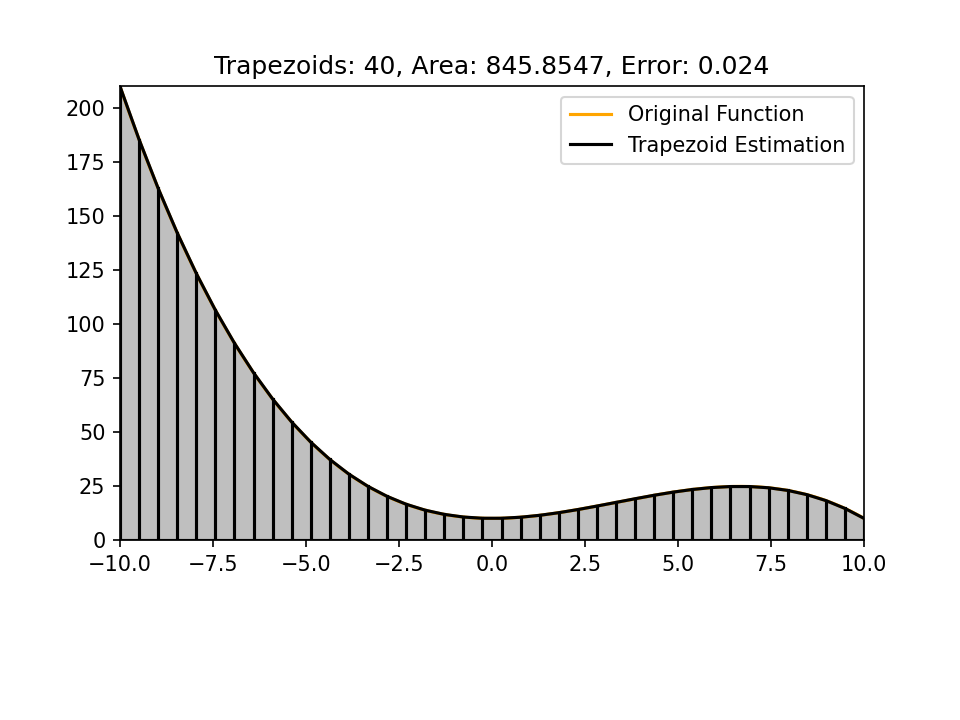

In [155]:
my_model.trapezium(40, plot=True)
# Uncomment the code below to see the output only or the animated graph
# my_model.trapezium(40)
# my_model.trapezium(40, animate=True) # Takes a while to load, around 5-20 seconds

In [156]:
my_model.trapezium(40, optimise=True)

With 40 trapezoids,
The Optimized estimated area is 855.6848141125348,
With an error of 0.012671368331690433


<p>From the results above, we can see that the optimised model has an error of 0.012 compared to the standard model's error of 0.024.</p>

<IPython.core.display.Javascript object>


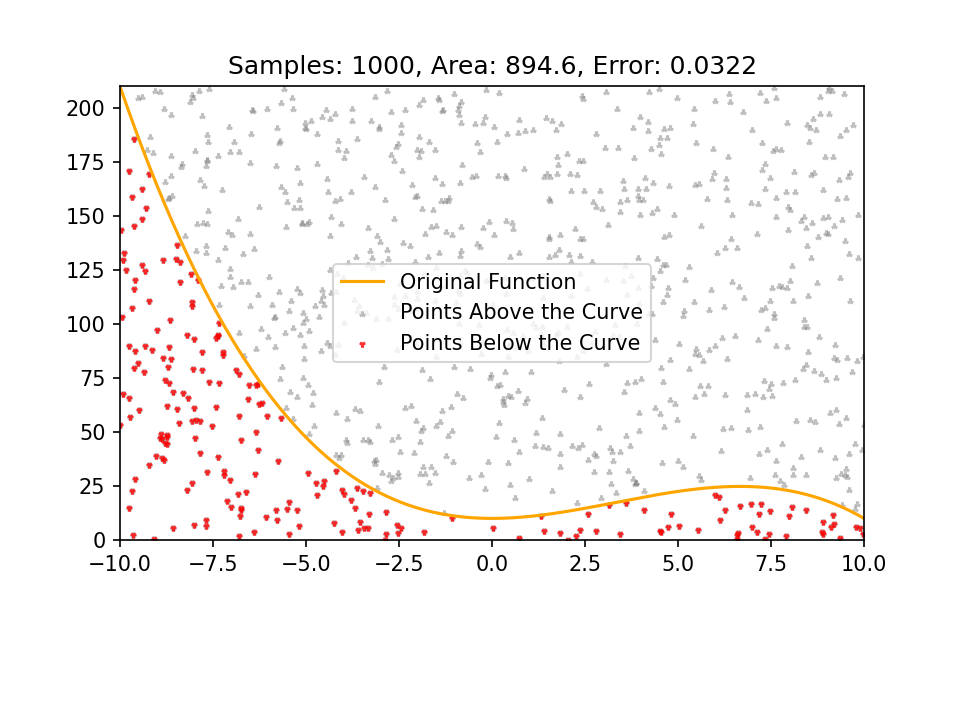

In [157]:
my_model.monte_carlo(1000, plot=True)
# Uncomment the code below to see the output only or the animated graph
# my_model.monte_carlo(1000)
# my_model.monte_carlo(1000, animate=True) # Takes a while to load, around 5-20 seconds

In [158]:
my_model.monte_carlo(1000, alternative=True)

With a sample of 1000 points,
The estimated area is 867.21161422704,
With an error of 0.0006287856465847269


<p>From the results above, we can see that the alternative monte carlo method has an error of 0.0006 compared to the standard model's error of 0.03</p>

<IPython.core.display.Javascript object>


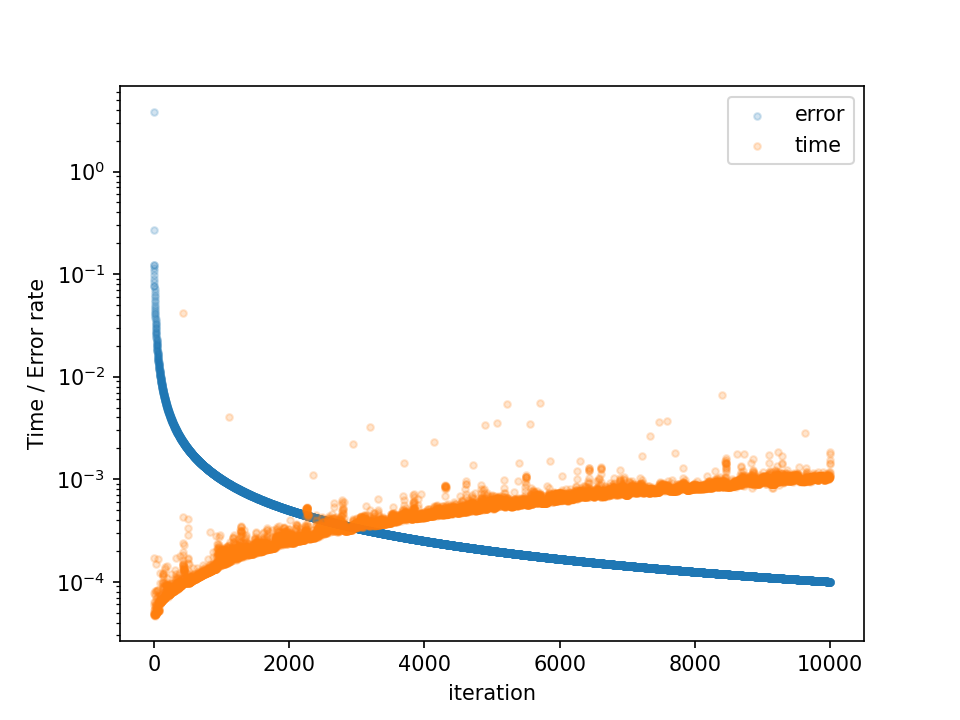

In [159]:
my_model.calculate_error(10000, model='trapezium')
# Takes a while to load, around 5-20 seconds

<p>Based on the graph above, a good balance between error rate and computational resources for the trapezium method is around 2500 trapeziums, where the two lines intersect</p>

<IPython.core.display.Javascript object>


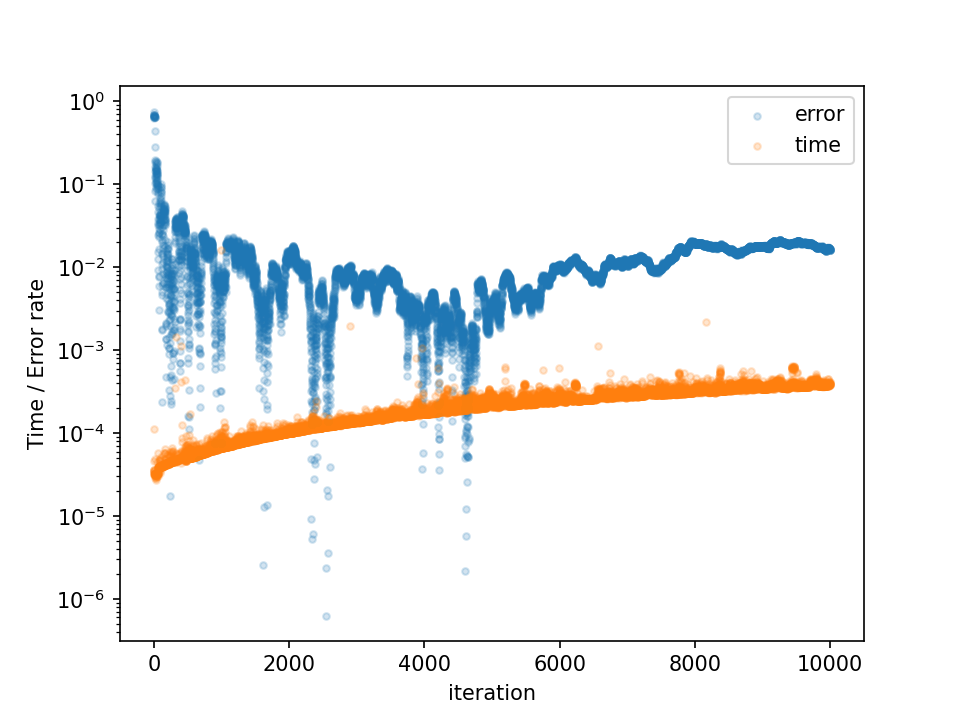

In [160]:
my_model.calculate_error(10000, model='monte carlo')
# Takes a while to load, around 5-20 seconds

<p>For the Monte Carlo Method however, since it's a stochastic process, and the random points are plotted randomly, the error rate fluctuates a lot, but based on the central limit theorem, as the sample goes to infinity, it will converge to a gaussian distribution. This also applies to K-higher dimensions.</p>

<a id="d"></a>
<h1>Discussions</h1>

<h3>Advantages & Disadvantages</h3>

<p>The advantages of using Trapezium Rule compared to the Monte Carlo method is that its simpler and its consistent as opposed to the Monte Carlo method which involves a stochastic process, meaning it includes an element of probability, varying the results slightly on each experiment. In contrast however, when integrating in higher dimensions, trapezium rule gets more computational heavy and its accuracy decreases because of that. Although you can use the lebesgue integral to overcome that problem by diving the curve on the y-axis instead of the x-axis, the Monte Carlo method is a more compact method to solving higher dimension integrals. Even if the accuracy wouldn't be exact, it will provide a good estimate with exponentially less computational power.</p>

<h3>Limitations</h3>
<p>There are numerous other ways of integration which are not specified in this project. Aside from that, this model is limited by dimensions, it only provides an environment for 2 dimensional curves, which are x and y. Most importantly, there are some functions which both of these models fail to integrate, such as those with sharp spikes or jumps.</p>

<h3>Conclusion</h3>
<p>In conclusion, this project has looked at the two methods of integration which are; The Trapezium Rule, and The Monte Carlo Integration method. This project has given a showcase of how the two method works and has given results in the form of a graph. This project has also compared the accuracy of each model and discussed the advantages and disadvantages of the two models. Finally, this project has given its limitations. For future research, including more methods of integration would be beneficial. As more discussions and comparisons can be made.

<a id='ref'/></a>
<h2>References</h2>

<ul>
<li>Bishop, Jacob (2013): 6.2.2-Numerical Integration: Romberg Integration and Richardson's Extrapolation. Youtube.
<br>Accessible at: <a href='https://www.youtube.com/watch?v=HtkylnbJklE&t=217s'>Click Me!</a></li><br>

<li>ChatGPT (2023): Integration Applications. chat.openai.com.
<br>Accessible at: <a href='https://openai.com/blog/chatgpt'>Click Me!</a></li><br>

<li>Hunter, John et al (2012): matplotlib.animation.FuncAnimation. Matplotlib.org.
<br>Accessible at: <a href='https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html'>Click Me!</a></li>
</ul>